## CSE3502 Information Security Management

## Embedded Project

## Hasnain Sikora 19BAI1072

### Determining the most optimal algorithm to train a machine learning based intrusion detection system

Performed the Machine Learning workflow which included the following steps:


## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline

## Importing the Dataset

* In this step we select and discover the data that was processed and will be used to train our machine learning model.
* The source of the dataset used is from Kaggle. It is a huge repository of community published data.

* The dataset consists of a wide variety of intrusions simulated in a military network environment. It has 25192 rows & 42 columns.
* Just after loading the data, the data was split into 7:3 training and testing data to prevent data leakage.

In [2]:
dataset = pd.read_csv("Dataset/Train_data.csv")
print("Training data has {} rows & {} columns".format(dataset.shape[0],dataset.shape[1]))
dataset.head()

Training data has 25192 rows & 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
X = dataset.drop("class", axis=1)
Y = dataset["class"]
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Exploratory Data Analysis

* This step focuses on performing a critical analysis of our dataset with an aim to find any discrepancies, interesting patterns, coorrelation in data, etc. 
* After completing our analysis in each step, we perform some standard data preprocessing techniques to make our process easier
* This is evidently one of the most time consuming steps of the project.
* This process will involve methods like: 
    * Data cleaning - handling missing values by mean imputation, etc.
    * Data Scaling and Normalisation - Scaling or Normalisation is common preprocessing technique used in machine learning where the data is ususally normalised to a scale of 0 to 1.
    * Data Encoding - Most of the models cannot process strings/objects. So the data needs to be transformed to numerical data. This process is known as data encoding(also data transformation).
    * Feature Selection - Removing redundant features or selecting the most "useful" features. We used recursive feature elimination for feature selection.

In [4]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<!-- * We identified various features with binary values and a few with redundancy.
* A few features have object data type that need to be encoded into numerical values.
* Also, few features have high scale difference and need to normalised. -->

In [5]:
print(X['is_host_login'].value_counts())

0    25192
Name: is_host_login, dtype: int64


In [6]:
print(X['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64


The 'is_host_login' and 'num_outbound_cmds' attributes have only one unique value i.e., 0. This introduces redundancy, as they clearly do not hold any differentiating power when it comes to building or model. We can drop such attributes and reduce the size of the data and hence improve the training process.

In [7]:
X.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### **Handling missing values**

We will be using mean imputation to handle the missing values. This will be backboned by the SimpleImputer function from the sklearn package.

In [8]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

X_object = X.select_dtypes("object")
X_int = X.select_dtypes(exclude = "object")

# To save the columns name for later use 
X_columns = X_int.columns

imputer.fit(X_int)
X_int = imputer.transform(X_int)
X_int = pd.DataFrame(X_int)
X_int.columns = X_columns
X_object = X_object.fillna("unknown")


X = X_object.join(X_int)



**Encoding X_object **

In [9]:
# to print the full summary
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   protocol_type                25192 non-null  object 
 1   service                      25192 non-null  object 
 2   flag                         25192 non-null  object 
 3   duration                     25192 non-null  float64
 4   src_bytes                    25192 non-null  float64
 5   dst_bytes                    25192 non-null  float64
 6   land                         25192 non-null  float64
 7   wrong_fragment               25192 non-null  float64
 8   urgent                       25192 non-null  float64
 9   hot                          25192 non-null  float64
 10  num_failed_logins            25192 non-null  float64
 11  logged_in                    25192 non-null  float64
 12  num_compromised              25192 non-null  float64
 13  root_shell      

In [10]:
# Descriptive analysis of the data
X.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
X.head()

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,tcp,ftp_data,SF,0.0,491.0,0.0,0.0,0.0,0.0,0.0,...,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,udp,other,SF,0.0,146.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,tcp,http,SF,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,...,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,tcp,http,SF,0.0,199.0,420.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Now, we plot various graphs to identify distributions, relationships or any pattern that is not visible by seeing raw data.



<AxesSubplot:xlabel='class', ylabel='count'>

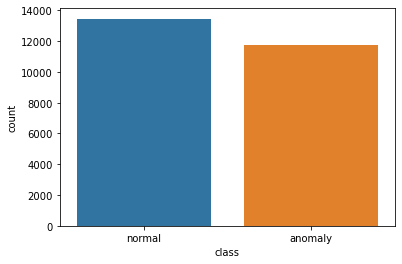

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(Y)


<AxesSubplot:xlabel='protocol_type', ylabel='count'>

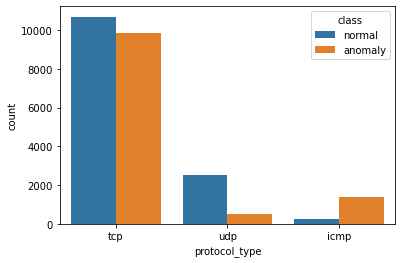

In [13]:
sns.countplot(X['protocol_type'], hue=Y)

<AxesSubplot:xlabel='flag', ylabel='count'>

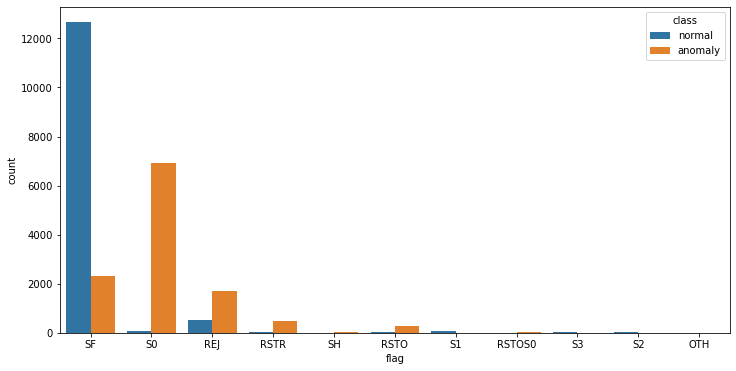

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(X['flag'], hue=Y)

<AxesSubplot:xlabel='count'>

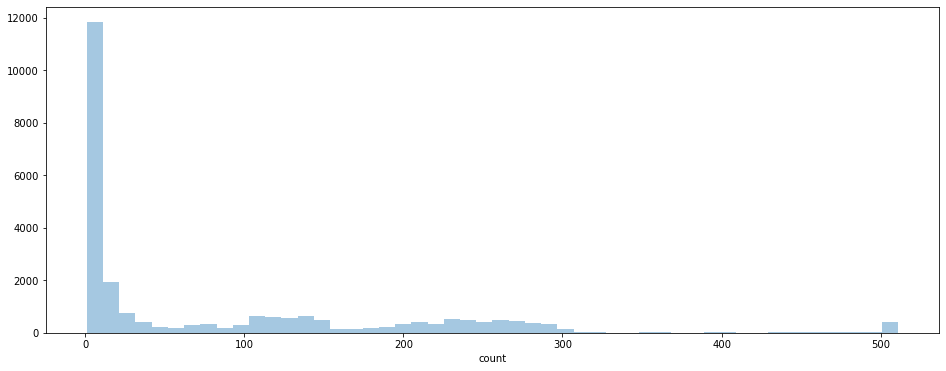

In [15]:
plt.figure(figsize=(16,6))
sns.distplot(X['count'], kde=False)

<AxesSubplot:xlabel='dst_host_srv_count', ylabel='Density'>

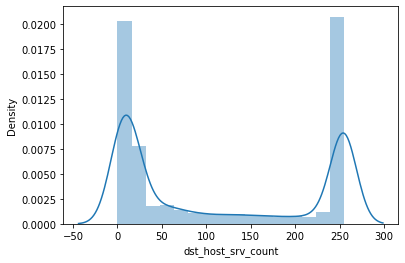

In [16]:
sns.distplot(X.dst_host_srv_count)

## **Important Observations:**
* A slight imbalance was identified in the target column "class" of our dataset.
* 80% of traffic belongs TCP while 12% belongs to UDP and rest to ICMP.
* Most of the ICMP traffic had anomaly; most of the UDP traffic was normal; while the distribution was almost equal in case of TCP.
* Most of the traffic with SF was normal, while that had S0 flag had anomaly.
* Most of the traffic recorded was unique.


**Using one hot encoding to encode the target class as 0s and 1s, so that it can be used for further analysis and training.**

In [17]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = LE.fit_transform(Y)
Y = pd.Series(Y)
Y

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Length: 25192, dtype: int64

<AxesSubplot:>

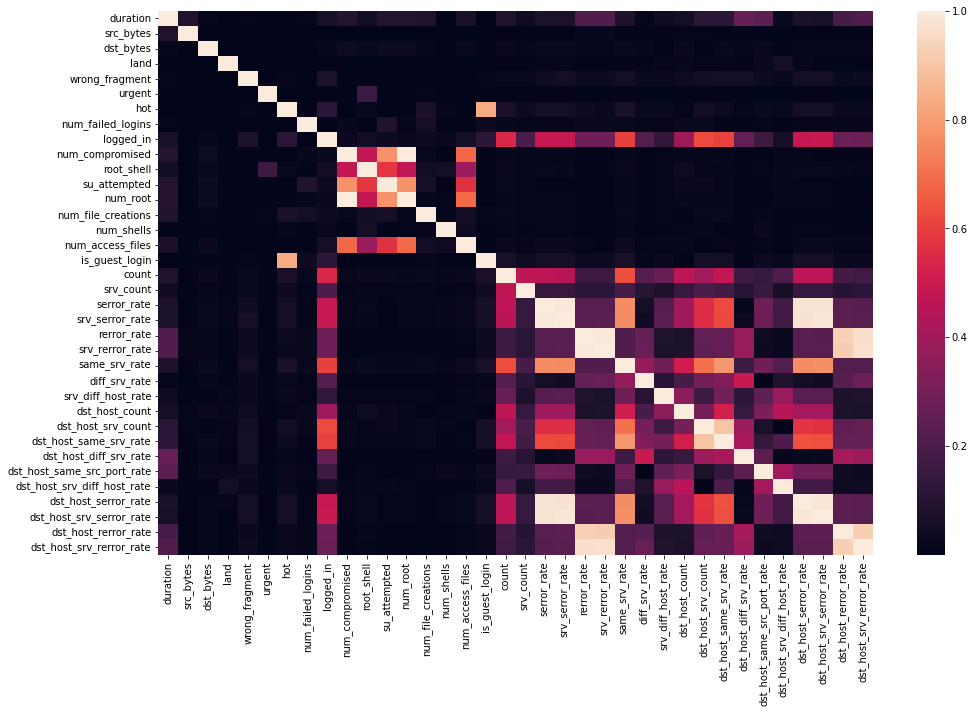

In [18]:
# Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(X.corr().apply(abs))

In [19]:
corr_with_target = X.corrwith(Y).apply(abs)
corr_with_target[corr_with_target>0.7]

same_srv_rate         0.749237
dst_host_srv_count    0.719292
dtype: float64

**Encoding the "object" data type fields**

In [21]:
class LabelEncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data):
        self.label_encoder = self.label_encoder.fit(list(data) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data):
        new_data = list(data)
        for unique_item in np.unique(data):
            if unique_item not in self.label_encoder.classes_:
                new_data = ['Unknown' if x==unique_item else x for x in new_data]
        return self.label_encoder.transform(new_data)

In [22]:
le = LabelEncoderExt()

for col in X.select_dtypes("object"):
  le.fit(X[col])
  X[col] = le.transform(X[col])

**Splitting Data**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [24]:
X_train

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
741,2,47,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,0.08,0.00,0.00,1.0,1.0,0.0,0.0
411,2,17,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.06,0.00,0.00,0.0,0.0,1.0,1.0
17841,2,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,14.0,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0
20962,1,14,9,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2.0,152.0,1.00,0.00,1.00,0.50,0.0,0.0,0.0,0.0
17790,2,47,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,94.0,9.0,0.10,0.12,0.01,0.00,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,3,12,9,0.0,46.0,71.0,0.0,0.0,0.0,0.0,...,255.0,254.0,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
5390,2,52,9,1.0,1601.0,326.0,0.0,0.0,0.0,0.0,...,92.0,52.0,0.57,0.05,0.01,0.00,0.0,0.0,0.0,0.0
860,2,23,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,6.0,0.02,0.07,0.00,0.00,0.0,0.0,1.0,1.0
15795,2,23,9,0.0,309.0,4281.0,0.0,0.0,0.0,0.0,...,21.0,255.0,1.00,0.00,0.05,0.05,0.0,0.0,0.0,0.0


In [25]:
X_test

,protocol_type,service,flag,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
19064,1,15,9,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00
11127,2,23,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,129.0,1.00,0.00,0.02,0.15,0.0,0.01,0.93,0.87
6517,2,47,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,3.0,0.01,0.06,0.00,0.00,1.0,1.00,0.00,0.00
2973,3,12,9,0.0,45.0,114.0,0.0,0.0,0.0,0.0,...,27.0,12.0,0.44,0.11,0.04,0.00,0.0,0.00,0.00,0.00
13339,2,23,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,12.0,1.00,0.00,0.08,0.00,1.0,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15322,2,47,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,9.0,0.04,0.07,0.00,0.00,0.0,0.00,1.00,1.00
24483,2,47,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,13.0,0.05,0.08,0.00,0.00,1.0,1.00,0.00,0.00
6778,3,47,9,0.0,105.0,147.0,0.0,0.0,0.0,0.0,...,255.0,249.0,0.98,0.01,0.02,0.00,0.0,0.00,0.00,0.00
9500,2,34,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,3.0,0.01,0.07,0.00,0.00,1.0,1.00,0.00,0.00


In [26]:
y_train

741      0
411      0
17841    0
20962    0
17790    0
        ..
21575    1
5390     1
860      0
15795    1
23654    0
Length: 17634, dtype: int64

In [27]:
y_test

19064    0
11127    1
6517     0
2973     1
13339    0
        ..
15322    0
24483    0
6778     1
9500     0
19865    0
Length: 7558, dtype: int64

**Feature scaling**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = X_train.columns

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = cols)

**Feature Selection**

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

rfc.fit(X_train_scaled, y_train)

feature_imp = pd.DataFrame({'feature':X_train.columns,'importance':rfc.feature_importances_})
feature_imp = feature_imp.sort_values('importance',ascending=False).set_index('feature')
feature_imp.head()

,importance
feature,
src_bytes,0.176242
dst_bytes,0.130507
flag,0.085616
same_srv_rate,0.066088
dst_host_same_srv_rate,0.059570


**Visualization of the Feature Importance**

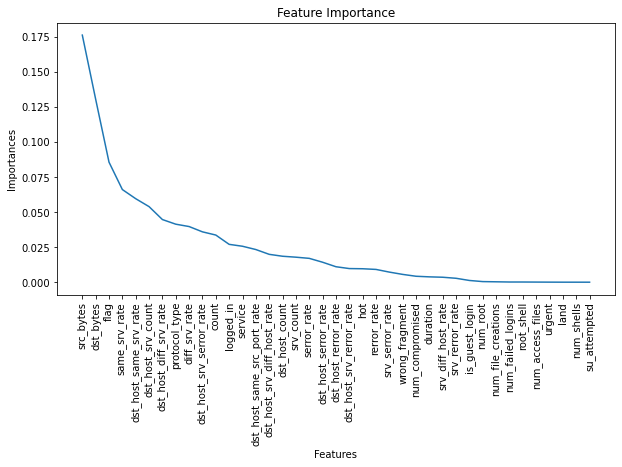

In [32]:
# plot feat_imp
plt.figure(figsize = (10, 5))
plt.title("Feature Importance")
plt.ylabel("Importances")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.plot(feature_imp)

**Using recursive feature elimination for Feature Selection**

This process selects features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [47]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier()
selector = RFE(estimator)
selector.fit(X_train_scaled, y_train)
X_train_scaled = selector.transform(X_train_scaled)
X_test_scaled = selector.transform(X_test_scaled)

### Determining the most optimal model

* Here, we choose the right models that can be used for the required task.
* Our task required us to use a Classification model.
* We selected 2 State of the art models - LightGBM and XGBoost
* We also selected a few standard models to compare the results and establish a good baseline performance metric. Logistic Regression, SVC, Naive Bayes models were used for this purpose.

In [60]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# SEED FOR RANDOM STATE
SEED = 42

# SVC MODEL
svc = SVC(random_state = SEED)

# LOGISTIC REGRESSION MODEL
lr = LogisticRegression()

# GAUSSIAN NAIVE BAYES
bnb = BernoulliNB()

# Train XGBOOST Classifier
xgbc = XGBClassifier(eval_metric="logloss", random_state=SEED)

# Train LightGBM Classifier
lgbmc = LGBMClassifier(random_state=SEED)


**Model testing on validation data**

* The cross_val_score function is used to perform the evaluation, taking the dataset and cross-validation configuration and returning a list of scores calculated for each fold.

* The model was trained on the training data which took a few minutes for each model.

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
models = {}
models['SVC']= svc
models['LogisticRegression']= lr
models['Naive Bayes Classifier']= bnb
models['XGBoost Classifier']= xgbc
models['LightGBM Classifier']= lgbmc
scores = {}
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], X_train_scaled, y_train, cv=cv, scoring=scorer)

In [62]:
def diff(name):
  return ''*(25-len(name)//2)

for name in models:
  print(diff(name), name, 'Model Validation', diff(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

 SVC Model Validation 
Mean precision: 
 94.76 % +- 0.72

Mean recall: 
 96.18 % +- 0.61

 LogisticRegression Model Validation 
Mean precision: 
 91.42 % +- 0.49

Mean recall: 
 92.59 % +- 0.97

 Naive Bayes Classifier Model Validation 
Mean precision: 
 86.04 % +- 0.83

Mean recall: 
 95.19 % +- 0.53

 XGBoost Classifier Model Validation 
Mean precision: 
 99.5 % +- 0.23

Mean recall: 
 99.66 % +- 0.17

 LightGBM Classifier Model Validation 
Mean precision: 
 99.42 % +- 0.3

Mean recall: 
 99.68 % +- 0.2



Though SVC classifier displayed good performance, but from the above results, we can observe that our model XGBoost Classifier and LightGBM Classifier perform the best on the validation data.

The evaluation metrics used are:

* Precision: also called positive predictive value, is the fraction of correct positive predictions among all the positive predictions.

* Recall: also known as sensitivity, is the fraction of correct positive predictions that were correct positives.

Precision and Recall can be calculated by:


   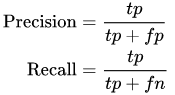

In [63]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100

<AxesSubplot:>

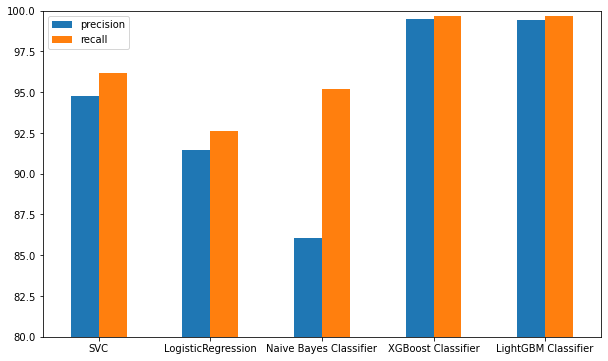

In [64]:
scores.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)

**Parameter Tuning**
* A model needs to be "tuned" for each particular scenario/ usecase based on the dataset.
* This includes changing various parameters and evaluating the results simulaneously.

**Making Predictions**
* After the model parameters are finalized and it is trained, it can be saved and used for making predictions.

In [65]:
models = {}
models['SVC']= svc
models['LogisticRegression']= lr
models['Naive Bayes Classifier']= bnb
models['XGBoost Classifier']= xgbc
models['LightGBM Classifier']= lgbmc
preds={}
for name in models:
    models[name].fit(X_train_scaled, y_train)
    preds[name] = models[name].predict(X_test_scaled)
print("Predictions complete.")

Predictions complete.


In [67]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

target_names=["normal","anamoly"]
for name in models:
    print(diff(name), name, 'Model Testing', diff(name))
    print(confusion_matrix(y_test, preds[name]))
    print(diff(name))
    print(classification_report(y_test, preds[name], target_names=target_names))

 SVC Model Testing 
[[3331  185]
 [ 156 3886]]

              precision    recall  f1-score   support

      normal       0.96      0.95      0.95      3516
     anamoly       0.95      0.96      0.96      4042

    accuracy                           0.95      7558
   macro avg       0.95      0.95      0.95      7558
weighted avg       0.95      0.95      0.95      7558

 LogisticRegression Model Testing 
[[3177  339]
 [ 282 3760]]

              precision    recall  f1-score   support

      normal       0.92      0.90      0.91      3516
     anamoly       0.92      0.93      0.92      4042

    accuracy                           0.92      7558
   macro avg       0.92      0.92      0.92      7558
weighted avg       0.92      0.92      0.92      7558

 Naive Bayes Classifier Model Testing 
[[2939  577]
 [ 177 3865]]

      

In [68]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100

<AxesSubplot:>

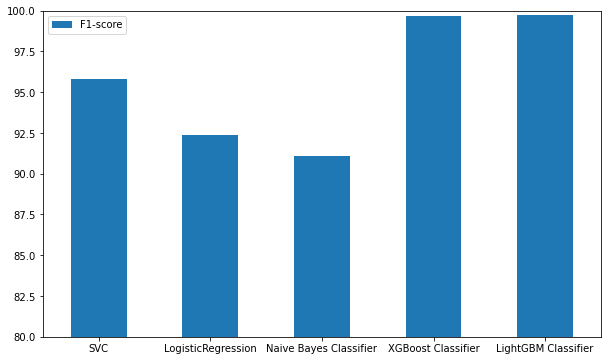

In [69]:
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)

**Hence we proceed on to choose the xgboost or the lightbgm classifcation model to perform intrusion detection using machine learning techniques.**
* Different cross validation techniques can be used to and the best performing one is chosen
* Similarly, the test train ratio is also determined by considering different possibilities.
* Our final selected models exceed the baseline performance by a significant level, and hence attests for an optimized result.